torch.Size([4, 1, 28, 28])
torch.Size([4])
torch.Size([1, 28, 28])


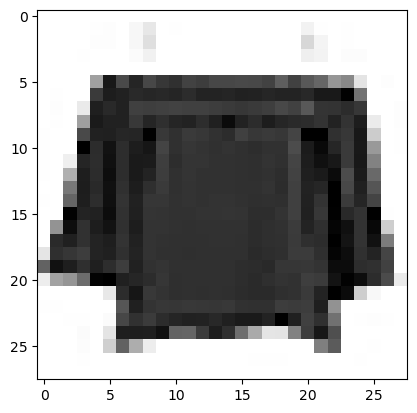

torch.Size([1, 28, 28])


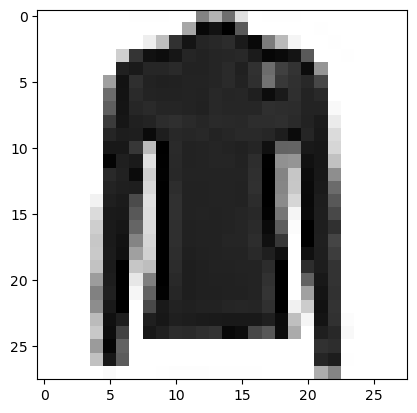

torch.Size([1, 28, 28])


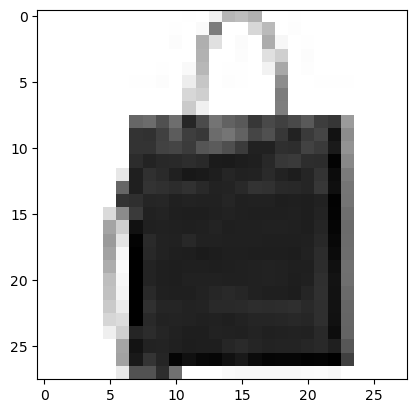

torch.Size([1, 28, 28])


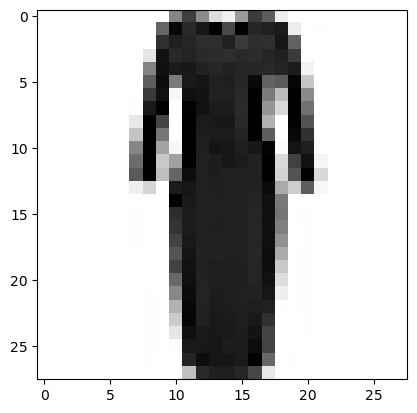

In [34]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt
import torchvision
import os
import sys
 
# 设置下载的pretrained模型保存位置
os.environ["TORCH_HOME"] = "./models"
 
# transforms，预处理
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (0.5, ))
    ]
)
 
# datasets
trainset = torchvision.datasets.FashionMNIST("./data", download=True, train=True, transform=transform)
testset = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=transform)
 
# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2, drop_last=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2, drop_last=False)
 
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
 
# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
 
for batch_images, batch_labels in trainloader:
    print(batch_images.shape)
    print(batch_labels.shape)
    for img in batch_images:
        print(img.shape)
        matplotlib_imshow(img, one_channel=True)
    break

torch.Size([4, 1, 28, 28])
torch.Size([4])
torch.Size([1, 28, 28])


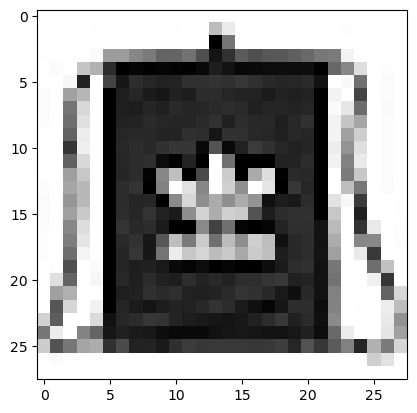

torch.Size([1, 28, 28])


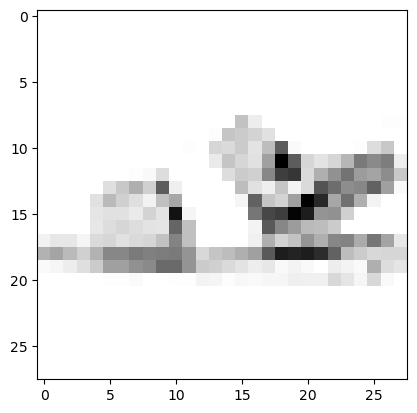

torch.Size([1, 28, 28])


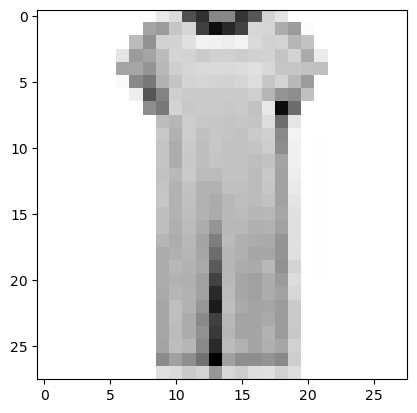

torch.Size([1, 28, 28])


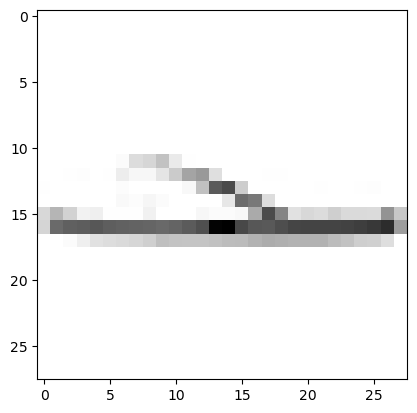

In [35]:
%matplotlib inline
import numpy as np
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn.functional as F
from matplotlib import pyplot as plt
import torchvision
import os
import sys
 
# 设置下载的pretrained模型保存位置
os.environ["TORCH_HOME"] = "./models"
 
# transforms，预处理
transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Normalize((0.5, ), (0.5, ))
    ]
)
 
# datasets
trainset = torchvision.datasets.FashionMNIST("./data", download=True, train=True, transform=transform)
testset = torchvision.datasets.FashionMNIST("./data", download=True, train=False, transform=transform)
 
# dataloaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2, drop_last=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False, num_workers=2, drop_last=False)
 
# constant for classes
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')
 
# helper function to show an image
# (used in the `plot_classes_preds` function below)
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()
 
for batch_images, batch_labels in trainloader:
    print(batch_images.shape)
    print(batch_labels.shape)
    for img in batch_images:
        print(img.shape)
        matplotlib_imshow(img, one_channel=True)
    break

In [36]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
 
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
 
 
net = Net()
net

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [37]:
#定义损失函数和优化方法
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

<class 'torch.Tensor'>


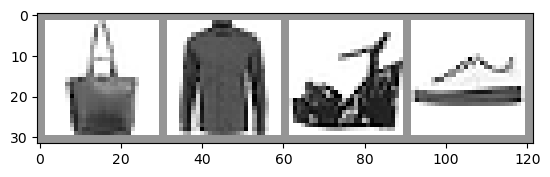

In [38]:
#tensorboard初始化
from torch.utils.tensorboard import SummaryWriter
 
# 创建TensorBoard写入对象
writer = SummaryWriter("./runs/fashion_mnist_experiment_1")
 
# 将训练数据图像写入TensorBoard
dataiter = iter(trainloader)
images, labels = dataiter.next()
 
# 创建图像网格区域
img_grid = torchvision.utils.make_grid(images)
print(type(img_grid))
 
matplotlib_imshow(img_grid, one_channel=True)

In [39]:
#add_image添加图片到tensorboard
writer.add_image("fasion mnist images", img_grid)
writer.close()

In [40]:
#add_graph可视化网络模型结构
writer.add_graph(net, images)
writer.close()

In [41]:
for i in range(10):
    writer.add_scalar("y = x^2", i ** 2, i)
writer.close()

In [42]:
#add_figure、add_scalar、add_pr_curve记录模型训练准确率、损失函数、PR曲线、ROC曲线等
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
 
# helper functions
 
# 计算输入图像的预测类别和对应的预测概率
def images_to_probs(net, images):
    '''
    Generates predictions and corresponding probabilities from a trained
    network and a list of images
    '''
    output = net(images)
    # convert output probabilities to predicted class
    _, preds_tensor = torch.max(output, 1)
    preds = np.squeeze(preds_tensor.numpy())
    return preds, [F.softmax(el, dim=0)[i].item() for i, el in zip(preds, output)]
 
# 使用matplotlib的subplots将一组images进行加载显示
def plot_classes_preds(net, images, labels):
    '''
    Generates matplotlib Figure using a trained network, along with images
    and labels from a batch, that shows the network's top prediction along
    with its probability, alongside the actual label, coloring this
    information based on whether the prediction was correct or not.
    Uses the "images_to_probs" function.
    '''
    preds, probs = images_to_probs(net, images)
    # plot the images in the batch, along with predicted and true labels
    fig = plt.figure(figsize=(12, 4))
    for idx in np.arange(4):
        ax = fig.add_subplot(1, 4, idx+1, xticks=[], yticks=[])
        matplotlib_imshow(images[idx], one_channel=True)
        ax.set_title("{0}, {1:.1f}%\n(label: {2})".format(
            classes[preds[idx]],
            probs[idx] * 100.0,
            classes[labels[idx]]),
                    color=("green" if preds[idx]==labels[idx].item() else "red"))
    return fig
 
# 计算准确率
def accuracy(net, images, labels):
    preds, probs = images_to_probs(net, images)
#     print(preds, labels)
#     print(preds == labels.numpy(), (preds == labels.numpy()).sum())
    
    acc = (preds == labels.numpy()).sum() / len(labels)
    return acc
 
# 计算在数据集上的loss、accuracy以及预测概率
def evaluate(net, dataloader):
    eval_loss = 0.0
    eval_acc = 0.0
    eval_probs = []
    eval_preds = []
    
    for i, data in enumerate(dataloader, 0):
        inputs, labels = data
        outputs = net(inputs)
        loss = criterion(outputs, labels).item()
        acc = accuracy(net, inputs, labels).item()
        eval_loss += loss
        eval_acc += acc
        preds, probs = images_to_probs(net, inputs)
        eval_probs.append(probs)
        eval_preds.append(preds)
#         print(i, loss, acc)
        
    return eval_loss / len(dataloader), eval_acc / len(dataloader), np.concatenate(eval_probs, axis=0), np.concatenate(eval_preds, axis=0)
 
# 绘制各个类别的ROC曲线
def plot_roc_curve(probs, labels, classes, figsize=(40, 4)):
    fig, axes = plt.subplots(1, len(classes), figsize=figsize)
    
    labels = labels.numpy()
    for cls_index, cls_name in enumerate(classes, 0):
        # 如果分类结果中只有一类是不能绘制ROC曲线和计算AUC的
        cls_labels = labels.copy()
        # 将训练标签中当前类型的label置为1（正类），其余类型的label置为0（负类）
        cls_labels[labels != cls_index] = 0
        cls_labels[labels == cls_index] = 1
#         print(cls_labels[:50])
        
        # 在预测概率中，保留当前类别的预测概率（正类），负类的预测概率为1 - 当前类别的概率
        cls_probs = probs.copy()
        cls_probs[labels != cls_index] = 1 - cls_probs[labels != cls_index]
        cls_probs = cls_probs.copy()
#         print(cls_probs[:50])
        
        fpr, tpr, thr = roc_curve(cls_labels, cls_probs)
#         print(fpr[:50])
#         print(tpr[:50])
        axes[cls_index].plot(fpr, tpr, label="AUC: {:.2f}".format(auc(fpr, tpr)))
        axes[cls_index].set_xlabel("FPR")
        axes[cls_index].set_ylabel("TPR")
        axes[cls_index].set_title(classes[cls_index])
        axes[cls_index].legend(loc="lower right")
#     plt.show()
    return fig
 
# 绘制各个类别的PR曲线
def plot_pr_curve(writer, probs, labels, classes, step):
    labels = labels.numpy()
    for cls_index, cls_name in enumerate(classes, 0):
        # 如果分类结果中只有一类是不能绘制ROC曲线和计算AUC的
        cls_labels = labels.copy()
        # 将训练标签中当前类型的label置为1（正类），其余类型的label置为0（负类）
        cls_labels[labels != cls_index] = 0
        cls_labels[labels == cls_index] = 1
#         print(cls_labels[:50])
        
        # 在预测概率中，保留当前类别的预测概率（正类），负类的预测概率为1 - 当前类别的概率
        cls_probs = probs.copy()
        cls_probs[labels != cls_index] = 1 - cls_probs[labels != cls_index]
        cls_probs = cls_probs.copy()
#         print(cls_probs[:50])
        writer.add_pr_curve("PR/{}".format(cls_name), cls_labels, cls_probs, global_step=step)
    return writer
 
# 计算各个类别的准确率
def plot_accuracy(writer, prebs, labels, classes):
    labels = labels.numpy()
    acc_dict = {}
    for cls_index, cls_name in enumerate(classes, 0):
        cls_labels = labels[labels == cls_index]
        cls_prebs = prebs[labels == cls_index]
 
        acc = (cls_labels == cls_prebs).sum() / cls_labels.shape[0]
        acc_dict[cls_name] = acc
        
    for cls_name, cls_acc in acc_dict.items():
        writer.add_scalar("Accuracy/{}".format(cls_name), cls_acc, epoch * len(trainloader) + i)
    return writer

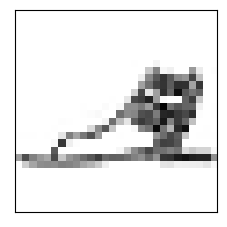

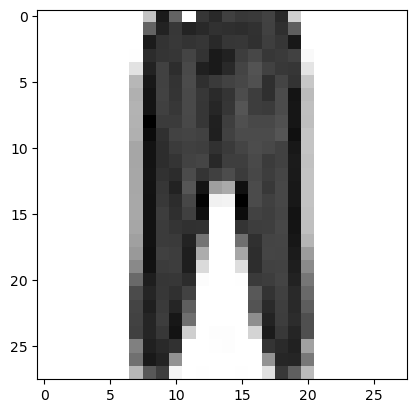

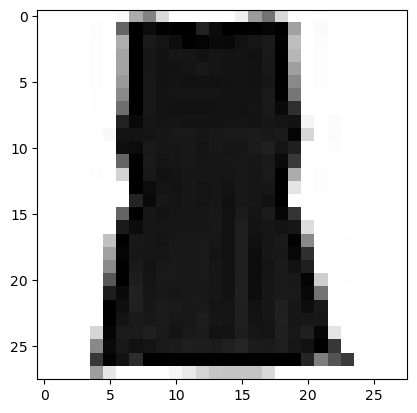

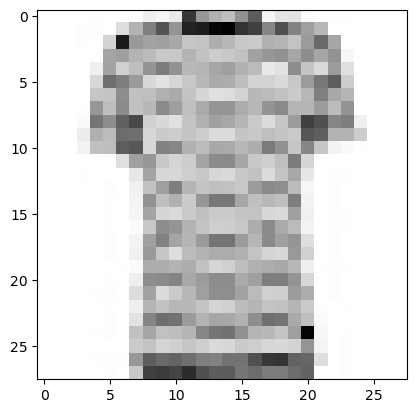

epoch: 0, iter: 999, train loss: 1.7635007981862874, train acc: 0.363, eval loss: 1.025148095485568, eval acc: 0.6288


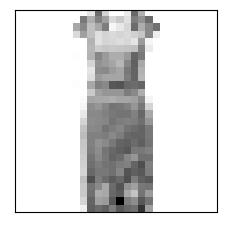

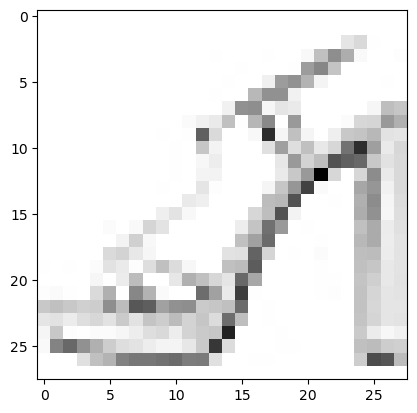

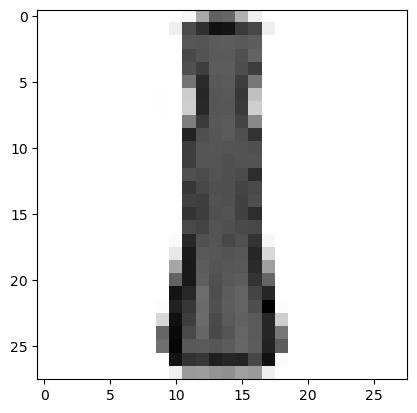

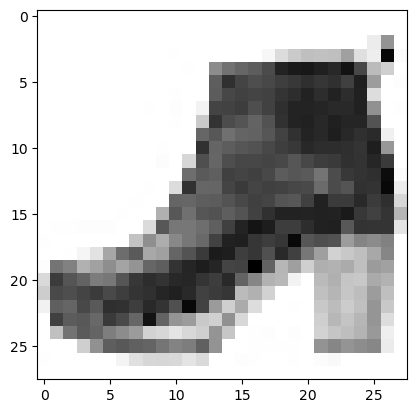

epoch: 0, iter: 1999, train loss: 0.7848016280401499, train acc: 0.7165, eval loss: 0.6969405535433442, eval acc: 0.7413


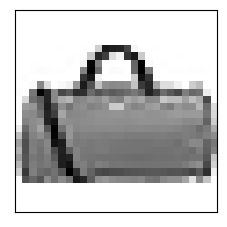

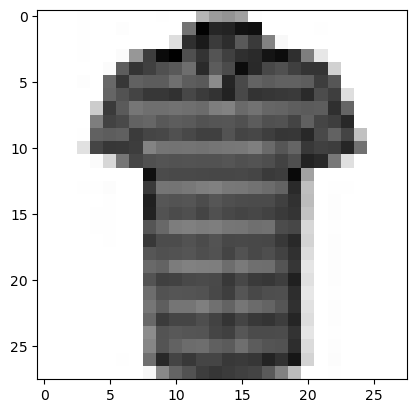

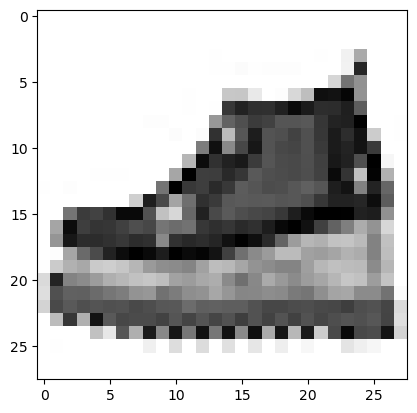

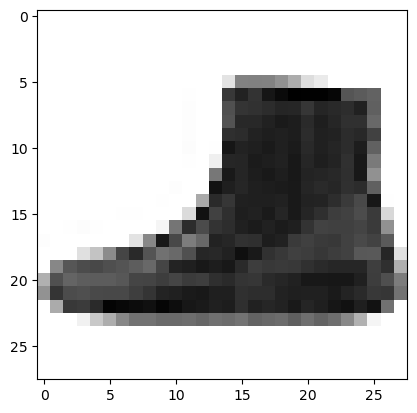

epoch: 0, iter: 2999, train loss: 0.6592407452920451, train acc: 0.7655, eval loss: 0.6537733974646777, eval acc: 0.759


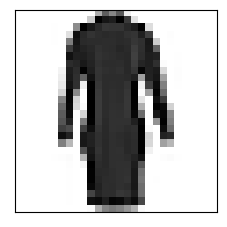

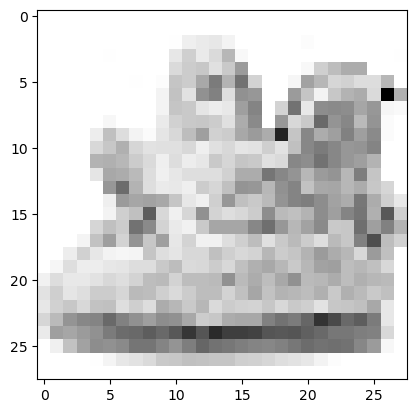

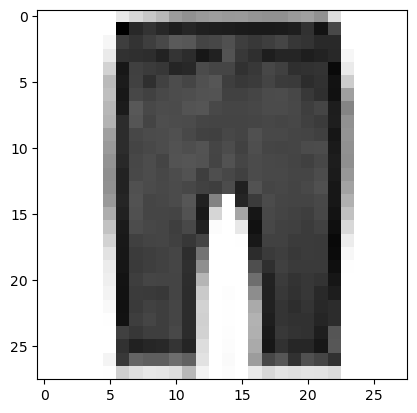

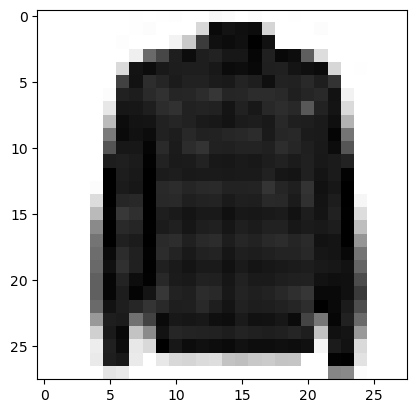

epoch: 0, iter: 3999, train loss: 0.6428419697214849, train acc: 0.7725, eval loss: 0.6267721941351425, eval acc: 0.7537


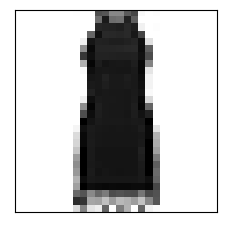

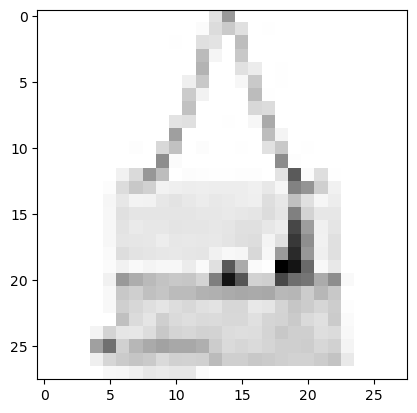

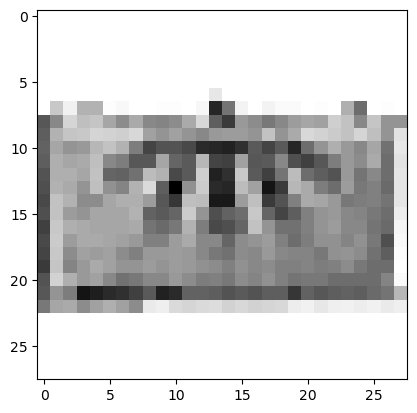

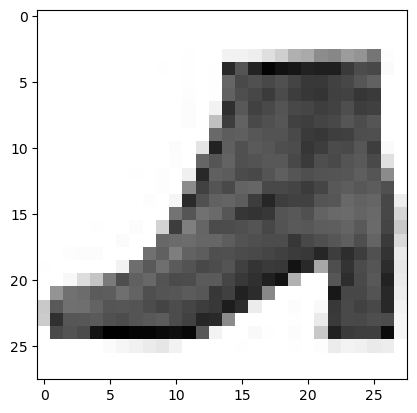

epoch: 0, iter: 4999, train loss: 0.5708673065250623, train acc: 0.799, eval loss: 0.6047108688896987, eval acc: 0.7788


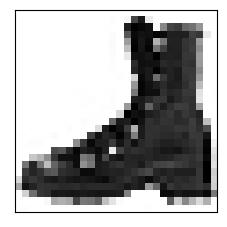

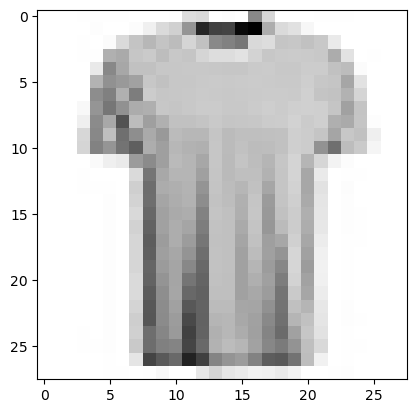

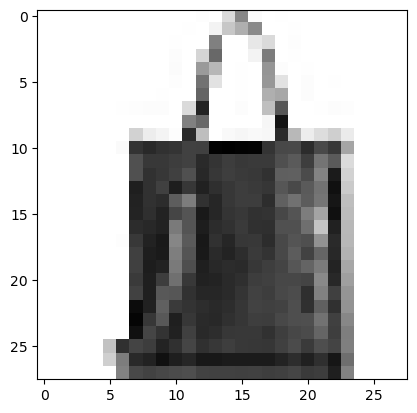

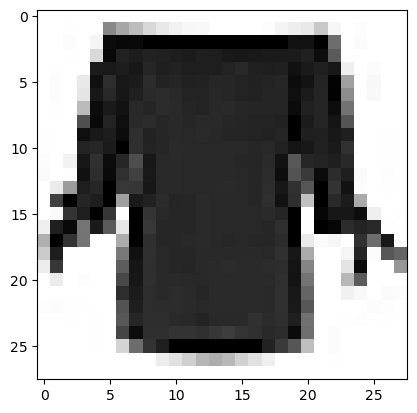

epoch: 0, iter: 5999, train loss: 0.5393926066563, train acc: 0.80775, eval loss: 0.5236428332839627, eval acc: 0.8011


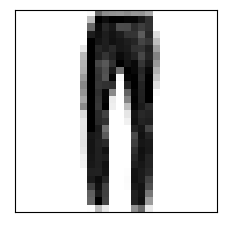

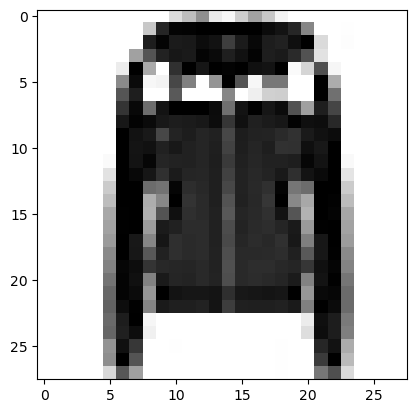

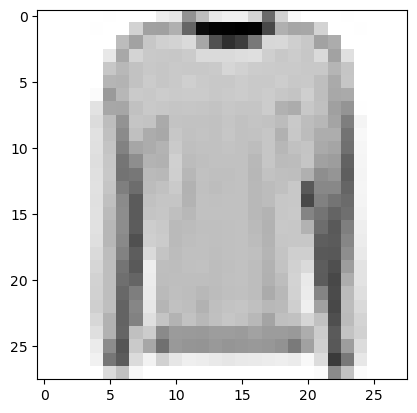

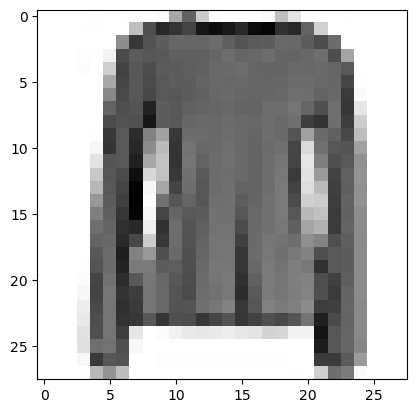

epoch: 0, iter: 6999, train loss: 0.5050133520001545, train acc: 0.82325, eval loss: 0.5377162210615352, eval acc: 0.7916


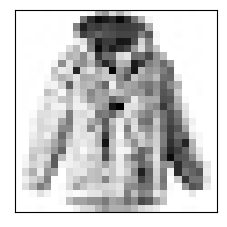

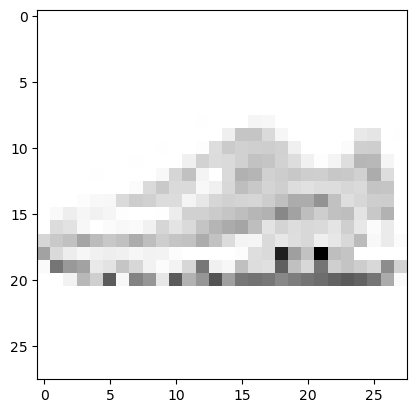

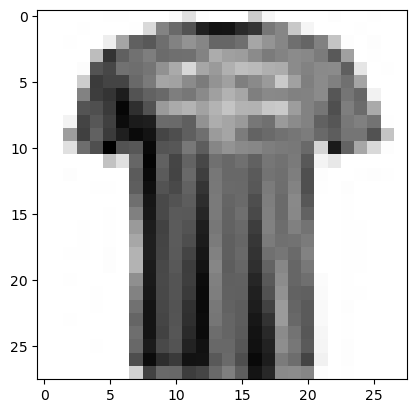

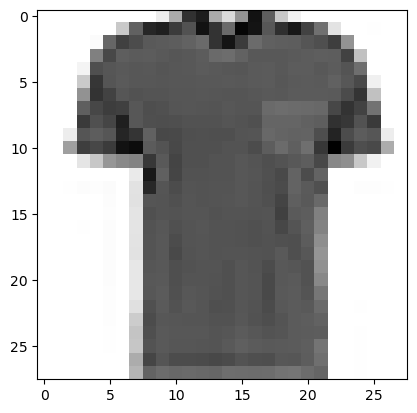

epoch: 0, iter: 7999, train loss: 0.4958199807149358, train acc: 0.8335, eval loss: 0.486293209370703, eval acc: 0.8156


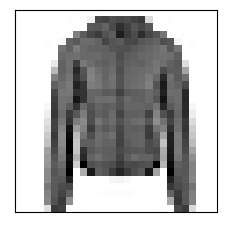

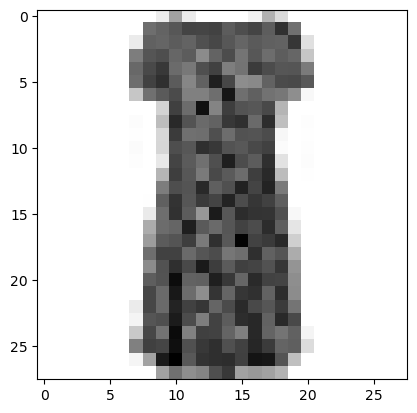

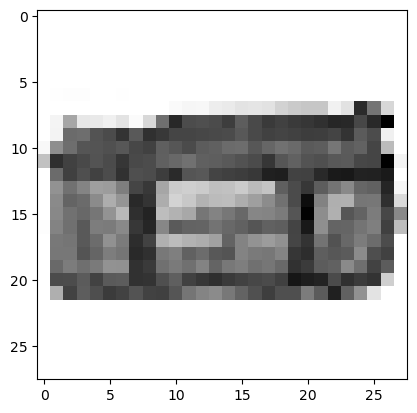

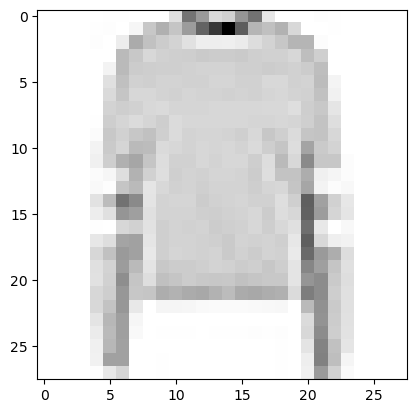

epoch: 0, iter: 8999, train loss: 0.4811604532091878, train acc: 0.83175, eval loss: 0.4941485956946155, eval acc: 0.8231


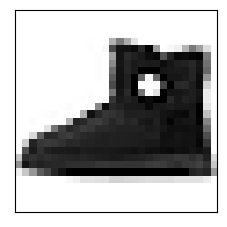

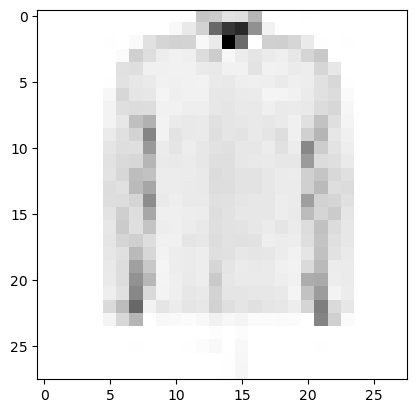

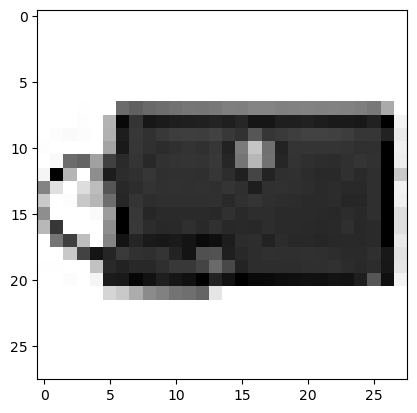

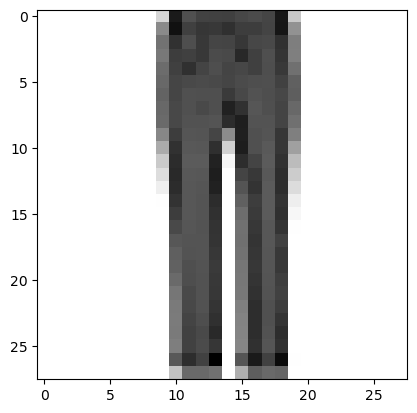

epoch: 0, iter: 9999, train loss: 0.4546854824491311, train acc: 0.8455, eval loss: 0.4820442110594595, eval acc: 0.8172


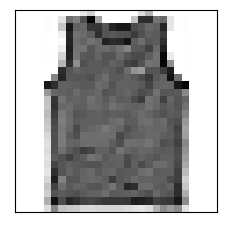

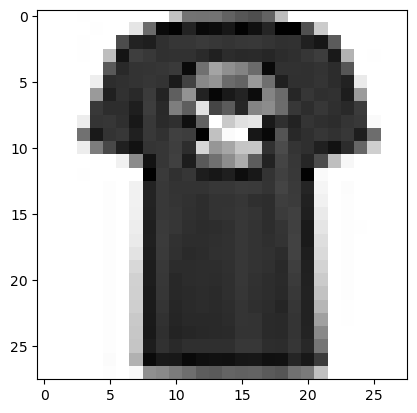

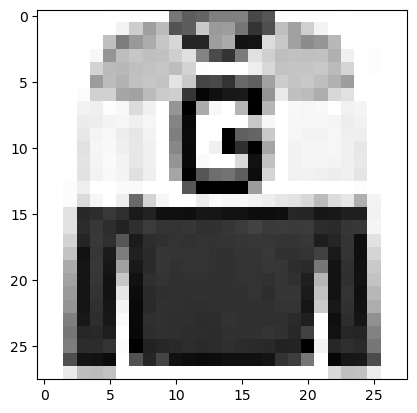

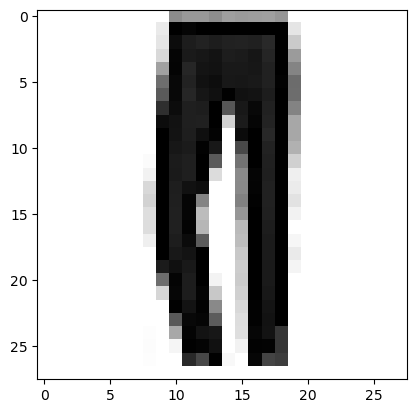

epoch: 0, iter: 10999, train loss: 0.4504435690131504, train acc: 0.83725, eval loss: 0.4548965229753871, eval acc: 0.8332


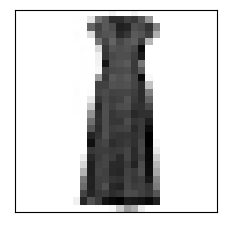

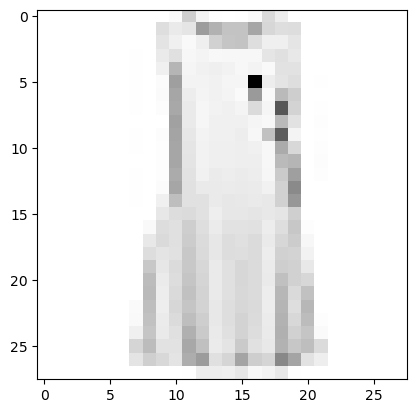

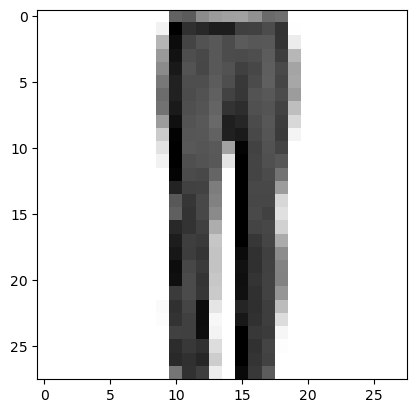

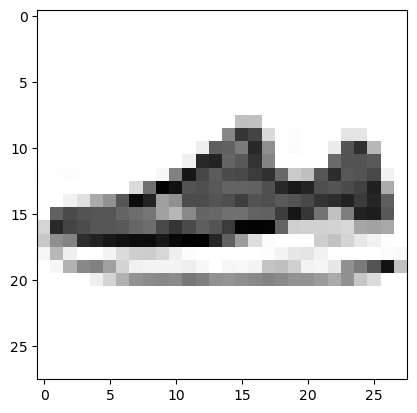

epoch: 0, iter: 11999, train loss: 0.44398556140915024, train acc: 0.843, eval loss: 0.49833401381992737, eval acc: 0.8141


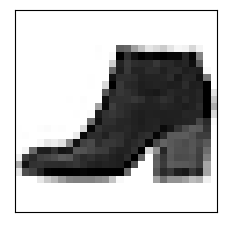

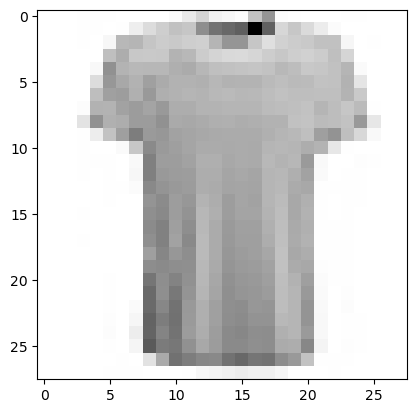

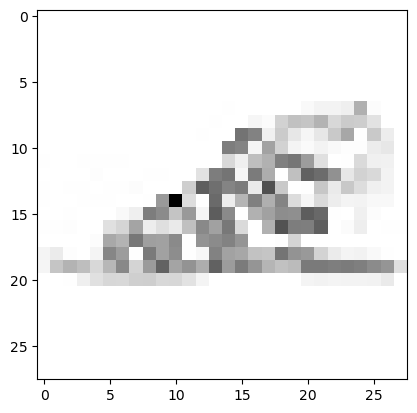

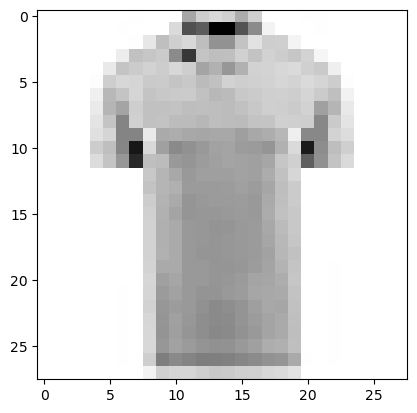

epoch: 0, iter: 12999, train loss: 0.44851132097258234, train acc: 0.84175, eval loss: 0.4517763138208189, eval acc: 0.8314


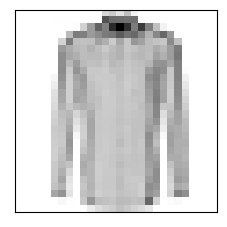

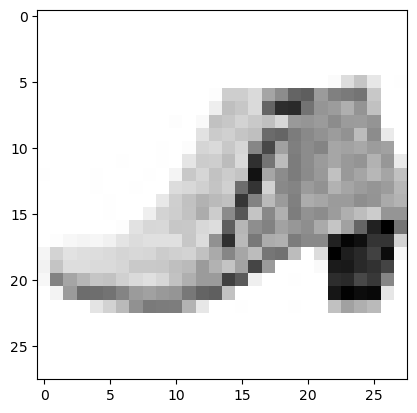

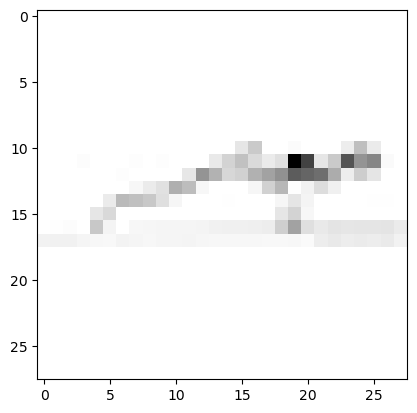

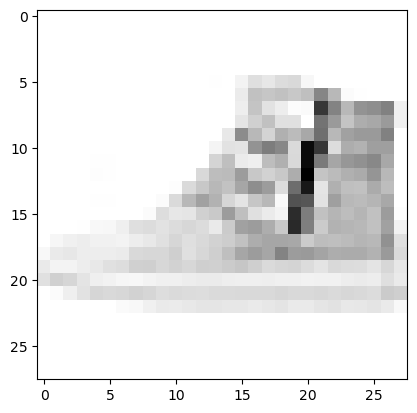

epoch: 0, iter: 13999, train loss: 0.41135902528470614, train acc: 0.85725, eval loss: 0.45490444738775043, eval acc: 0.8299


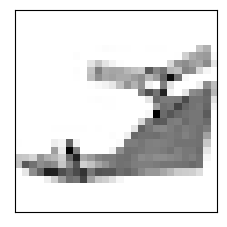

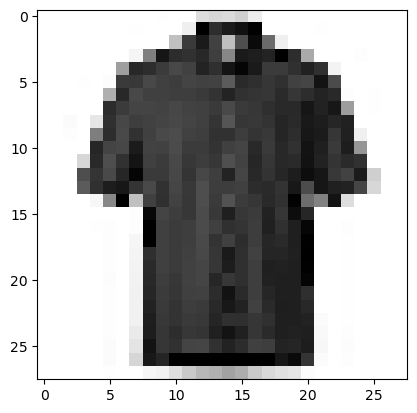

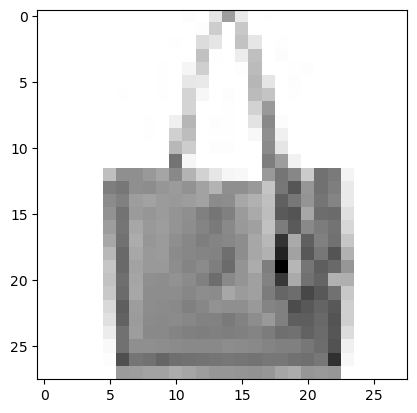

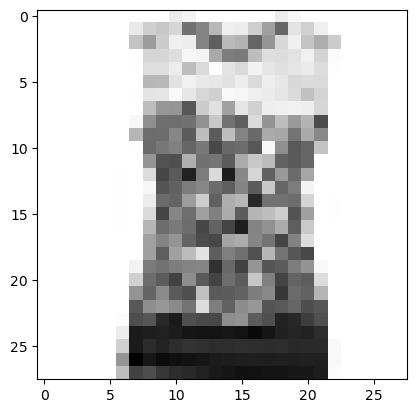

epoch: 0, iter: 14999, train loss: 0.4024012885976117, train acc: 0.86125, eval loss: 0.42122343651408445, eval acc: 0.8445


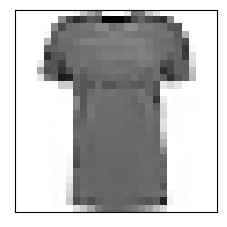

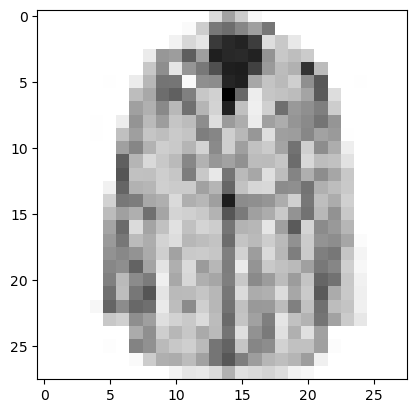

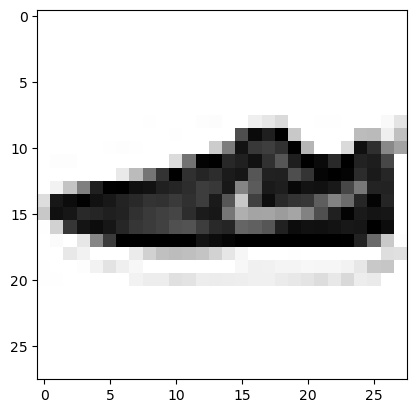

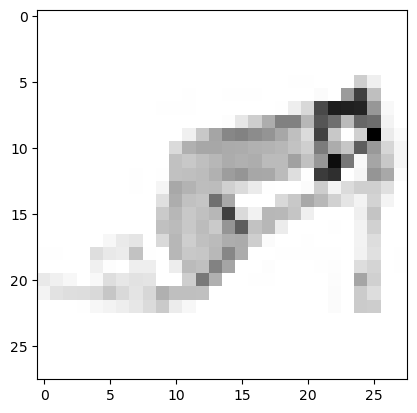

epoch: 1, iter: 999, train loss: 0.42289629650244026, train acc: 0.8535, eval loss: 0.4426402478417265, eval acc: 0.834


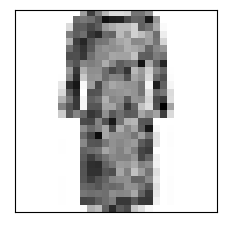

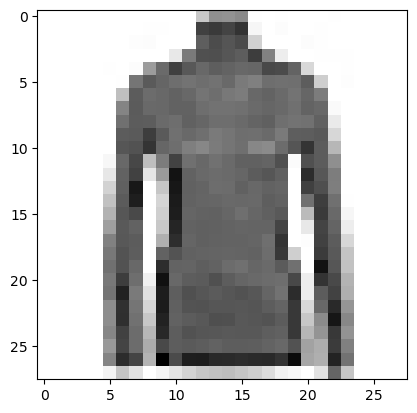

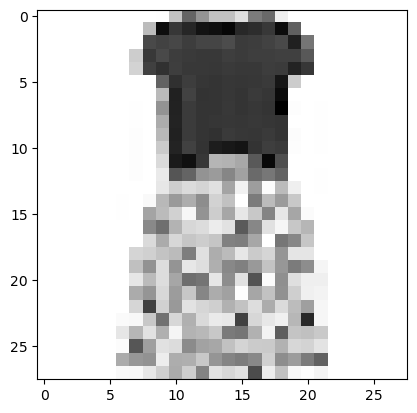

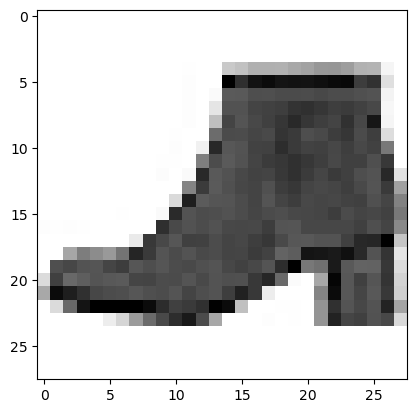

epoch: 1, iter: 1999, train loss: 0.3950736000954057, train acc: 0.86275, eval loss: 0.45489626438674385, eval acc: 0.8343


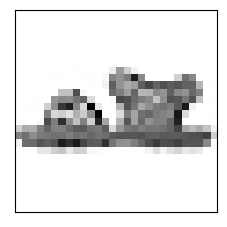

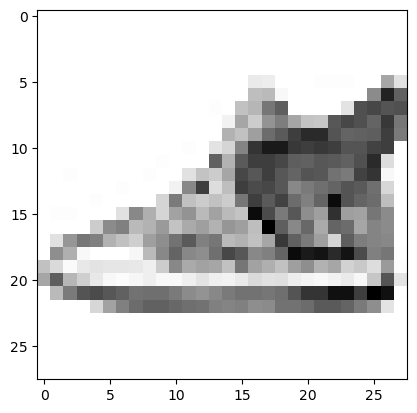

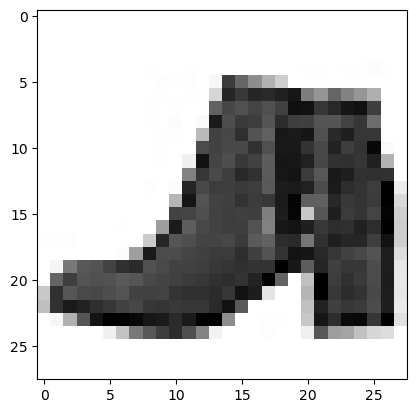

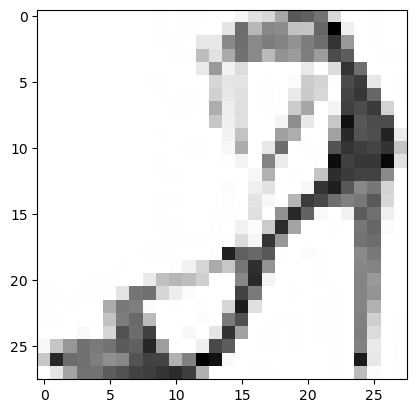

epoch: 1, iter: 2999, train loss: 0.3826472778216994, train acc: 0.868, eval loss: 0.4067875842471418, eval acc: 0.8499


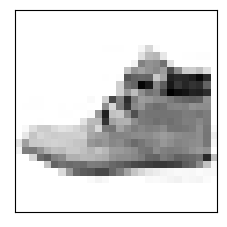

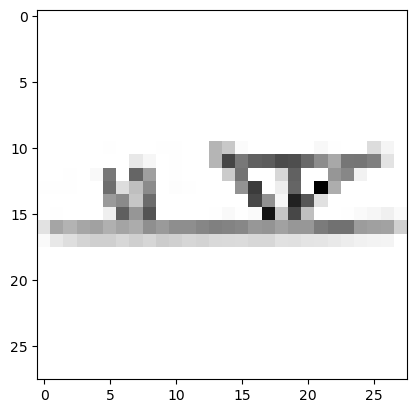

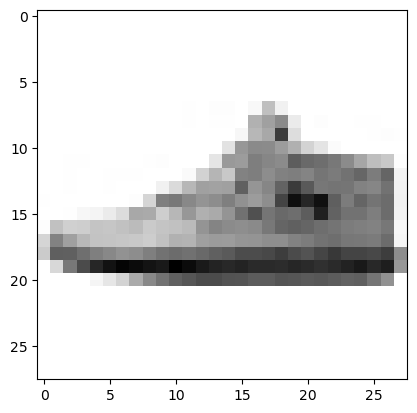

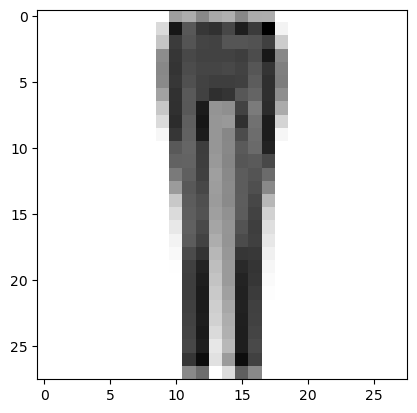

epoch: 1, iter: 3999, train loss: 0.3925988028636202, train acc: 0.8625, eval loss: 0.4156406460573577, eval acc: 0.8494


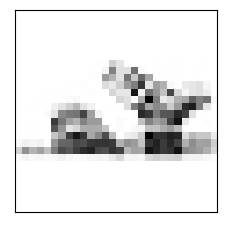

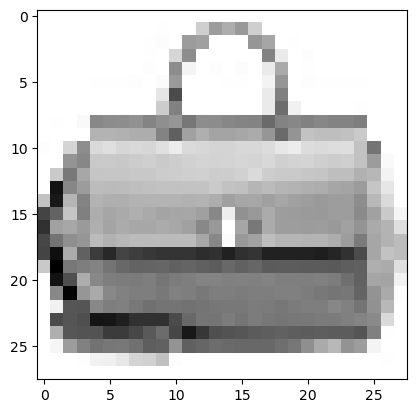

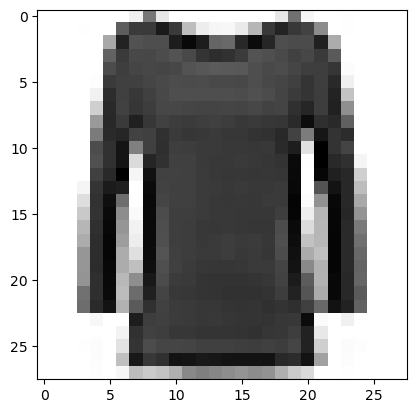

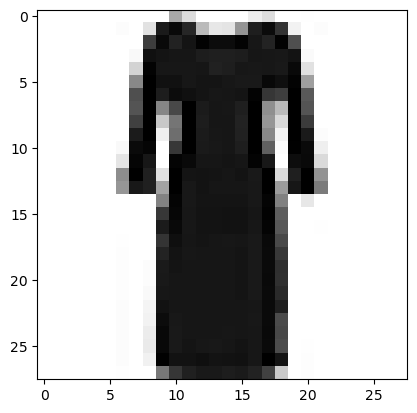

epoch: 1, iter: 4999, train loss: 0.39579550685719006, train acc: 0.86075, eval loss: 0.39715517491204444, eval acc: 0.8529


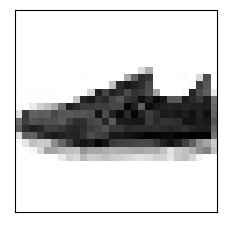

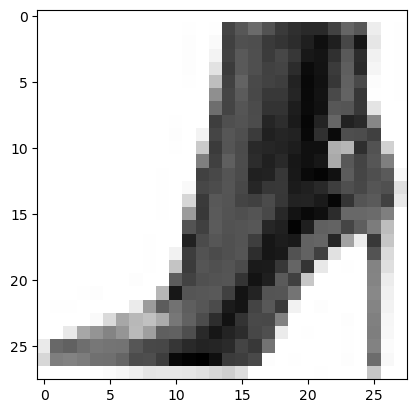

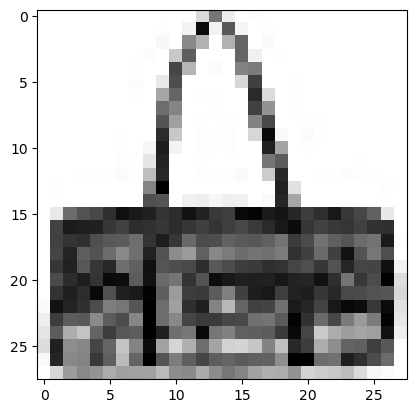

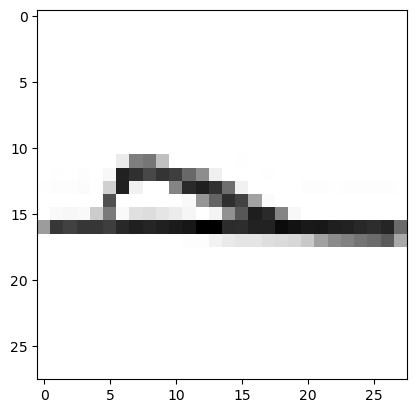

epoch: 1, iter: 5999, train loss: 0.38428203637246044, train acc: 0.86275, eval loss: 0.39372836623455515, eval acc: 0.8519


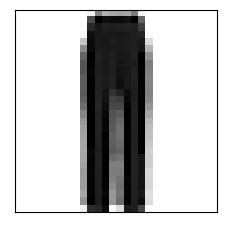

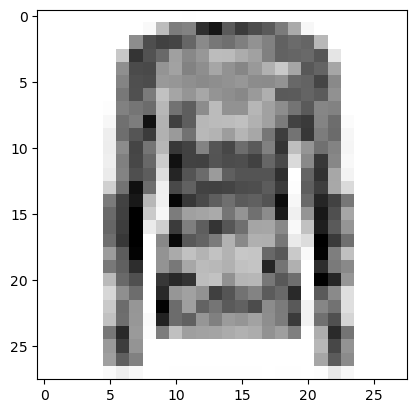

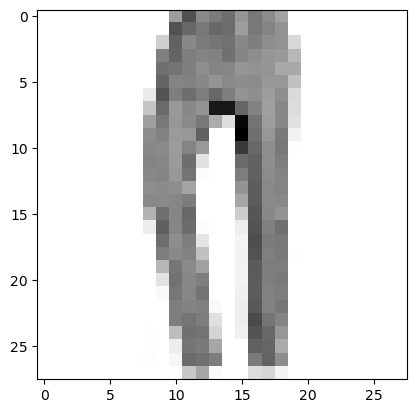

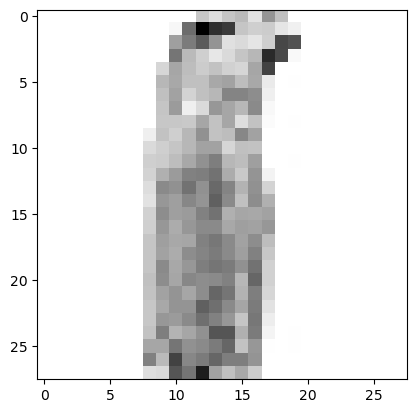

epoch: 1, iter: 6999, train loss: 0.38305019757780245, train acc: 0.86625, eval loss: 0.44329087006476187, eval acc: 0.8311


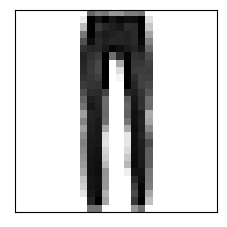

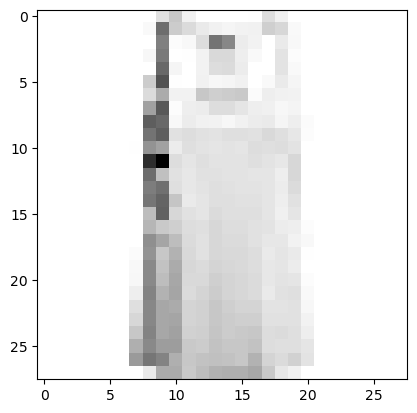

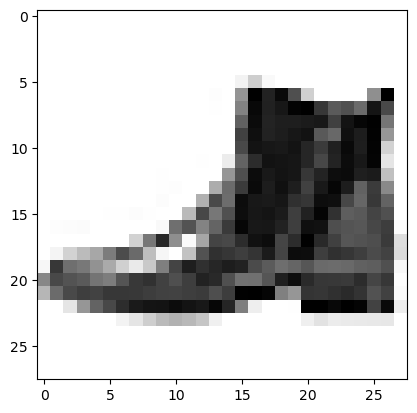

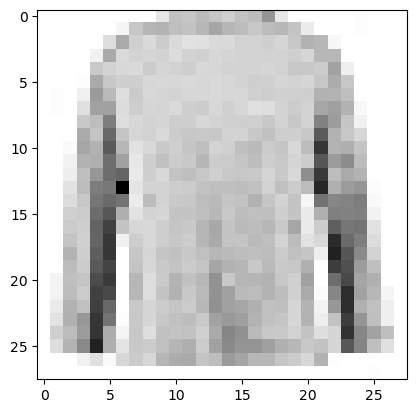

epoch: 1, iter: 7999, train loss: 0.34865139833727155, train acc: 0.88175, eval loss: 0.3801825996715488, eval acc: 0.8574


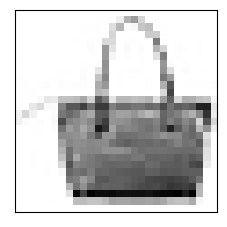

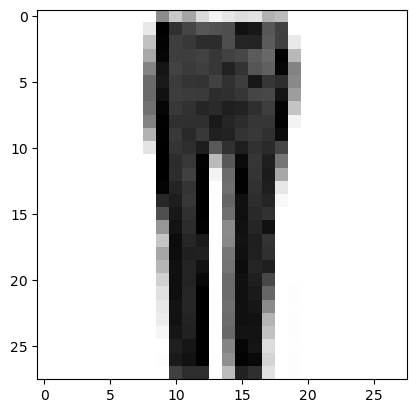

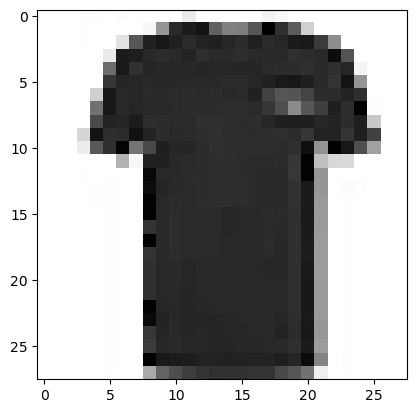

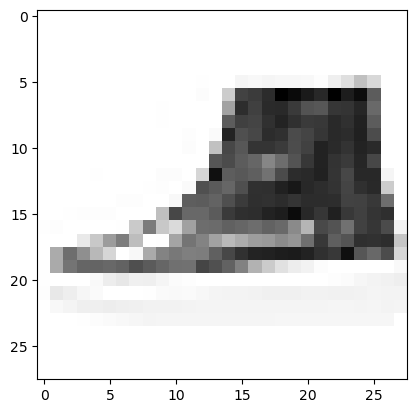

epoch: 1, iter: 8999, train loss: 0.3739710289873765, train acc: 0.87725, eval loss: 0.4013404729251517, eval acc: 0.8538


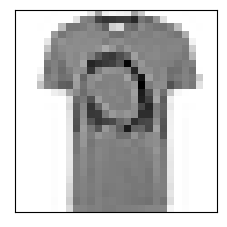

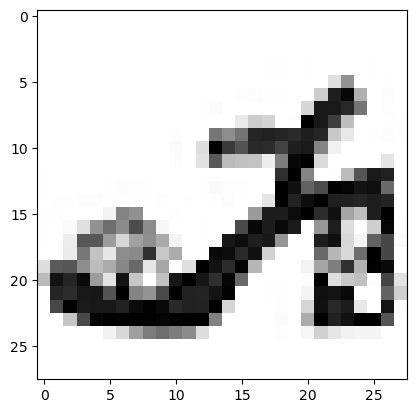

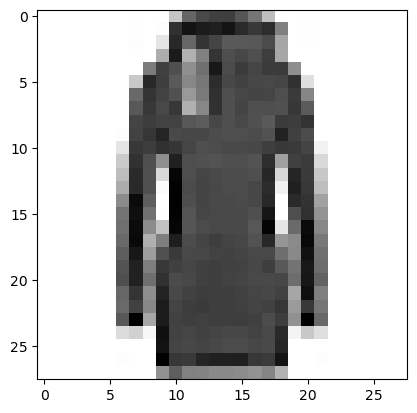

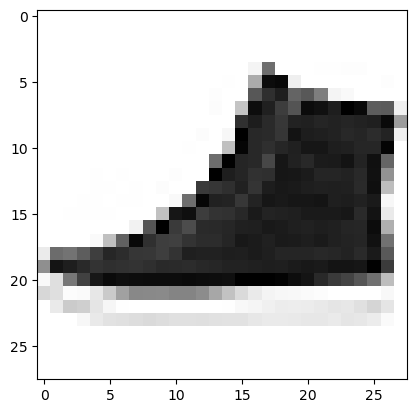

epoch: 1, iter: 9999, train loss: 0.3782323991693847, train acc: 0.86725, eval loss: 0.36180471225618094, eval acc: 0.8658


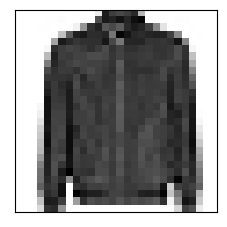

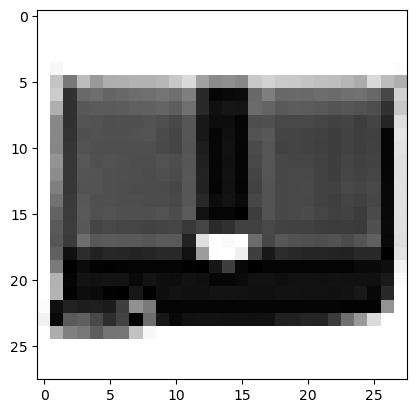

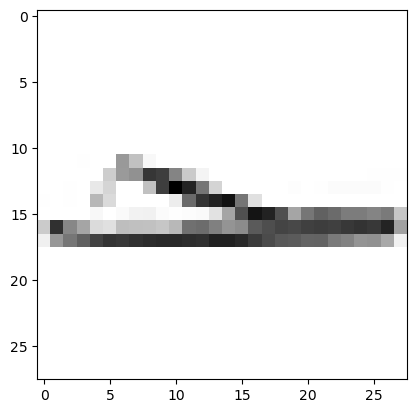

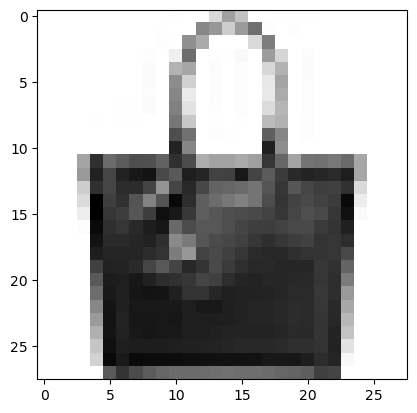

epoch: 1, iter: 10999, train loss: 0.3468925208902074, train acc: 0.8815, eval loss: 0.37336215821726293, eval acc: 0.8577


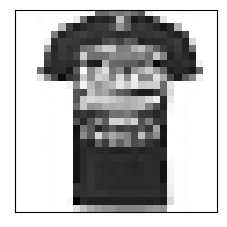

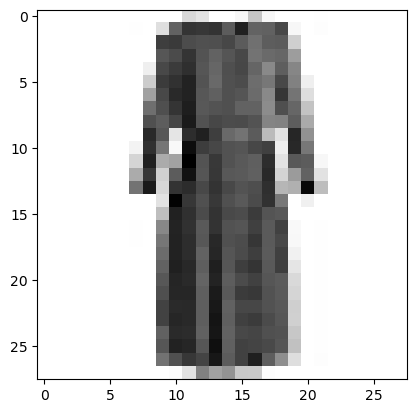

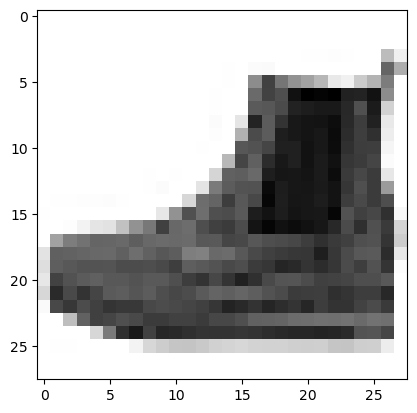

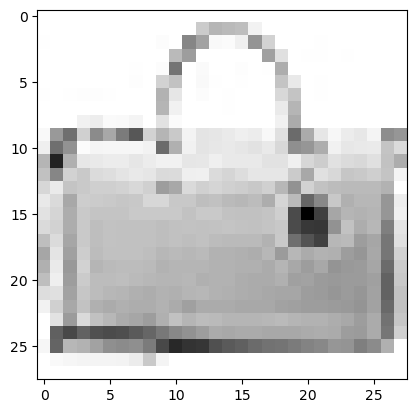

epoch: 1, iter: 11999, train loss: 0.3527357718357598, train acc: 0.87575, eval loss: 0.3922197627503658, eval acc: 0.8547


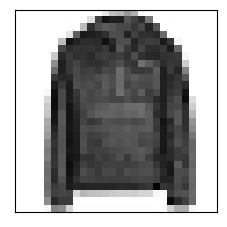

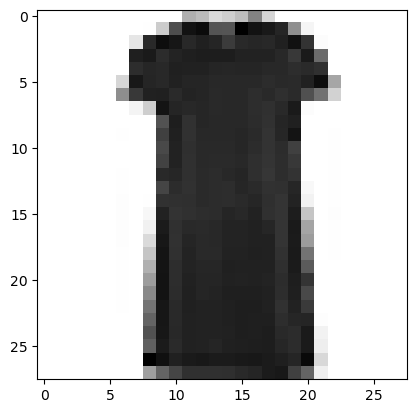

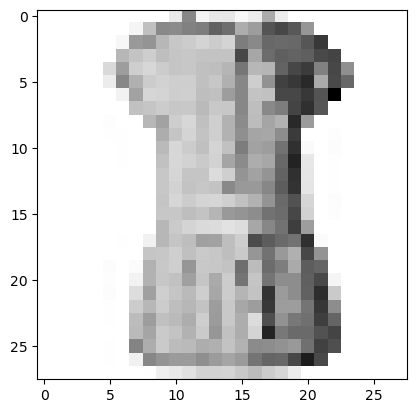

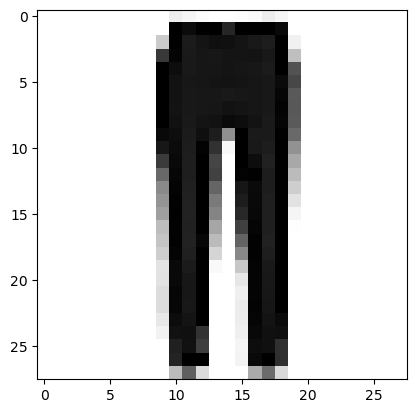

epoch: 1, iter: 12999, train loss: 0.33915382782294184, train acc: 0.88125, eval loss: 0.40360548571988475, eval acc: 0.8496


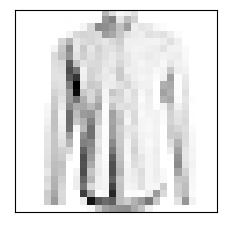

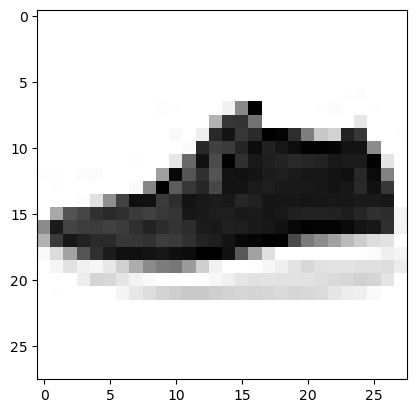

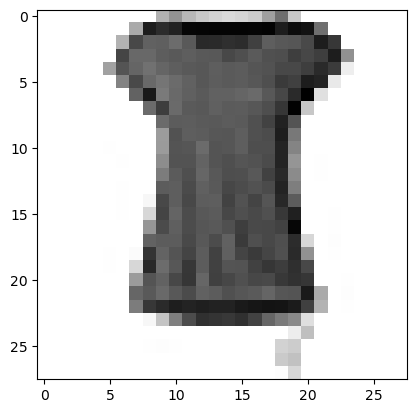

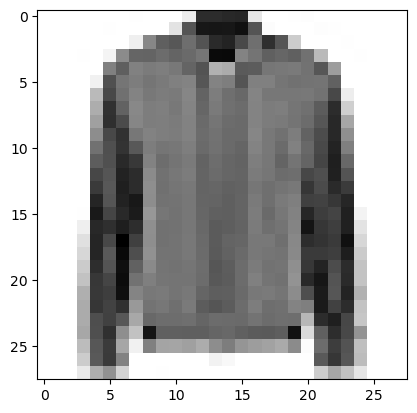

epoch: 1, iter: 13999, train loss: 0.36586374839319613, train acc: 0.87375, eval loss: 0.3665587325959059, eval acc: 0.866


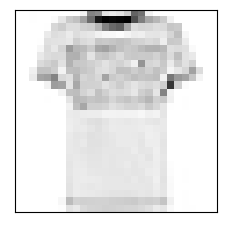

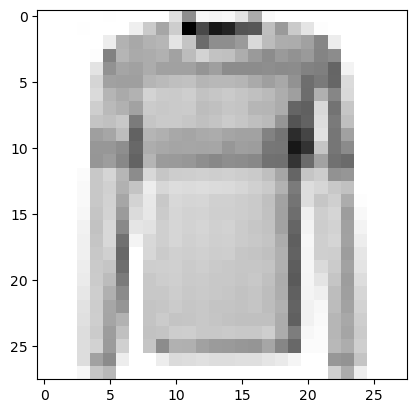

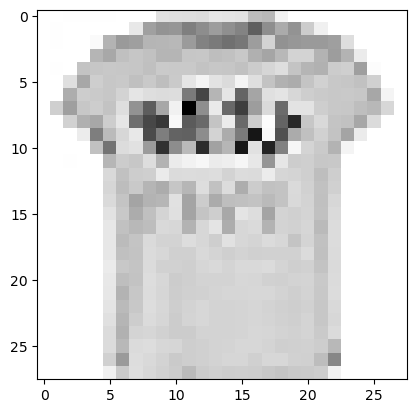

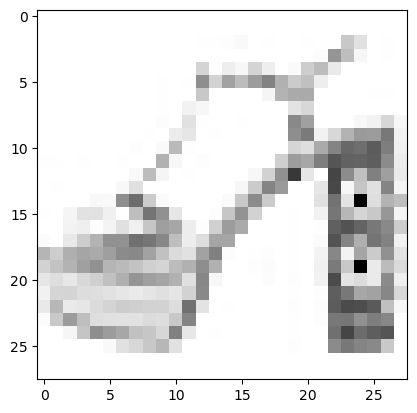

epoch: 1, iter: 14999, train loss: 0.34326990131422647, train acc: 0.88, eval loss: 0.36950395557321897, eval acc: 0.8617


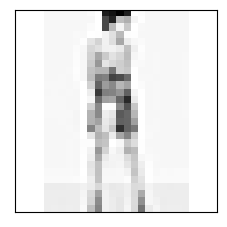

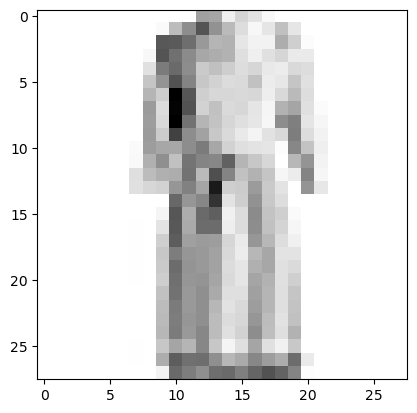

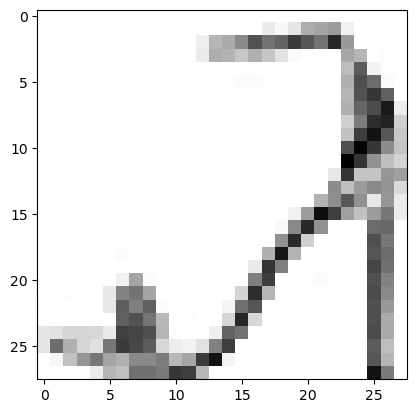

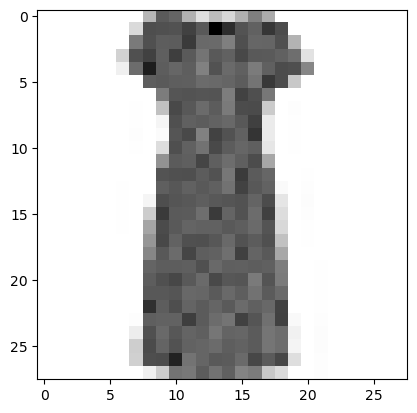

epoch: 2, iter: 999, train loss: 0.3050833226305549, train acc: 0.89725, eval loss: 0.36551032437804404, eval acc: 0.8671


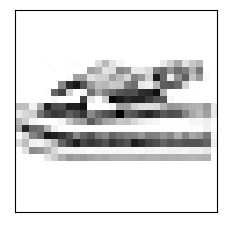

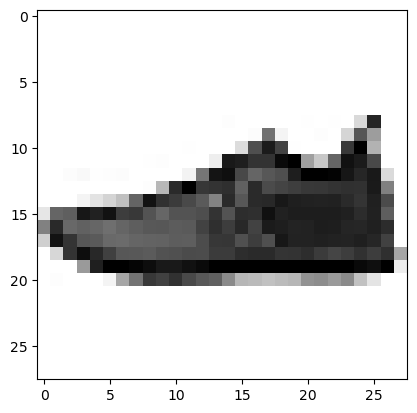

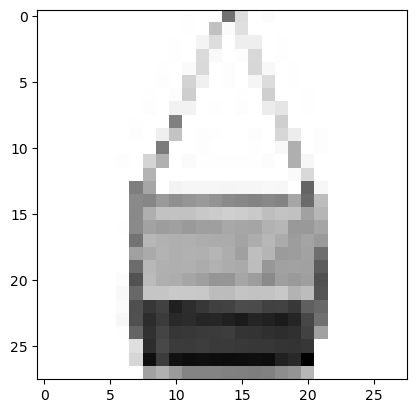

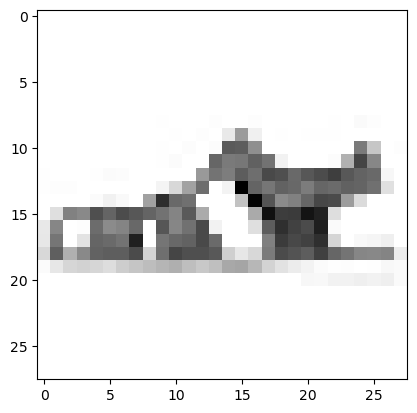

epoch: 2, iter: 1999, train loss: 0.35612113563473397, train acc: 0.881, eval loss: 0.38427809256103357, eval acc: 0.8558


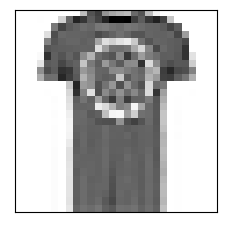

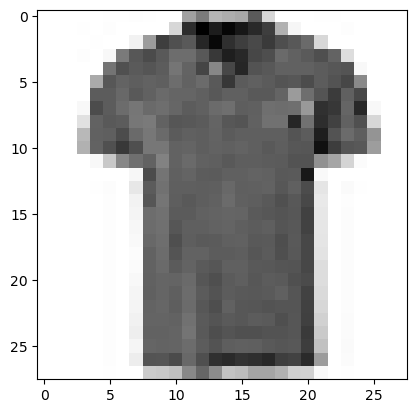

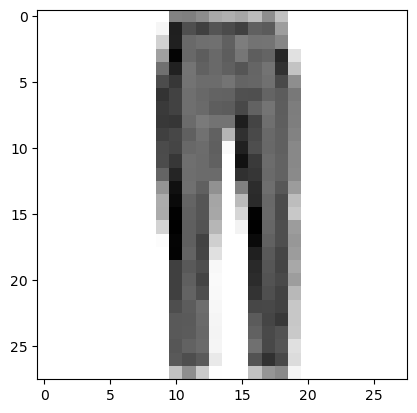

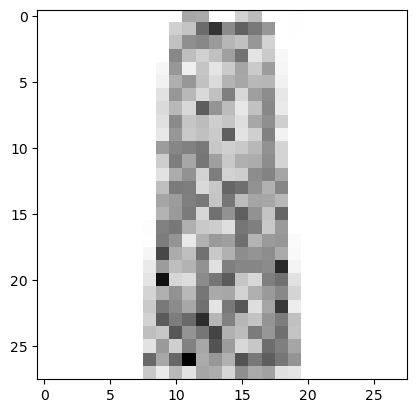

epoch: 2, iter: 2999, train loss: 0.34012568407516663, train acc: 0.88275, eval loss: 0.3554766603106182, eval acc: 0.8673


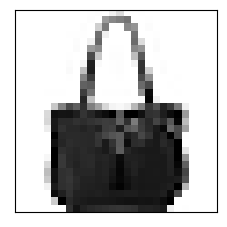

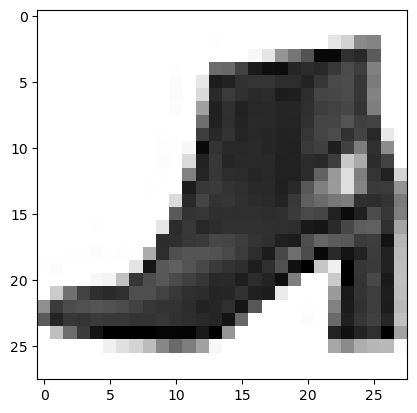

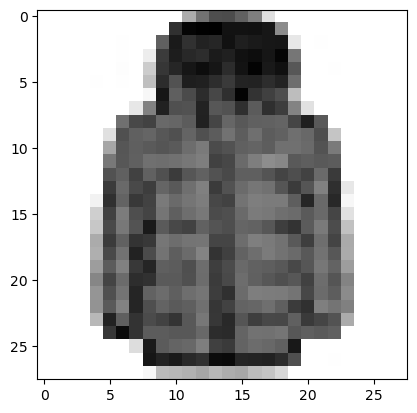

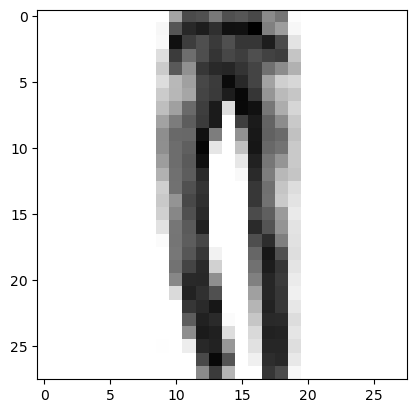

epoch: 2, iter: 3999, train loss: 0.3652821335386252, train acc: 0.86725, eval loss: 0.3591261701394367, eval acc: 0.8645


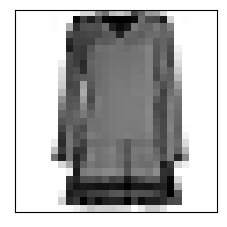

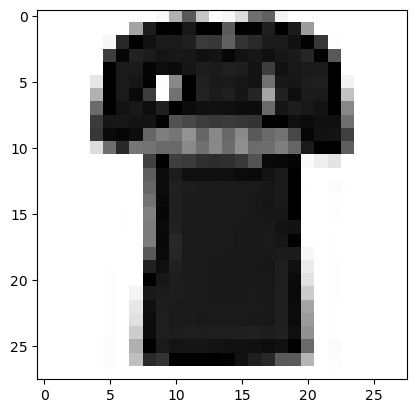

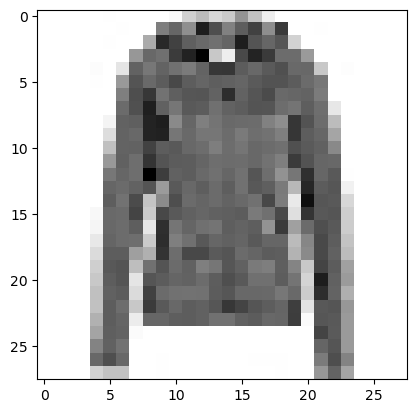

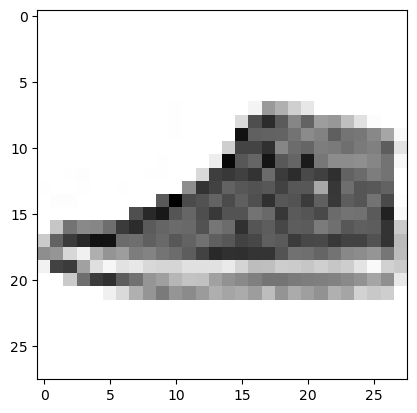

epoch: 2, iter: 4999, train loss: 0.3389587415846181, train acc: 0.88175, eval loss: 0.3610038460024429, eval acc: 0.8683


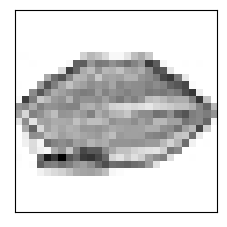

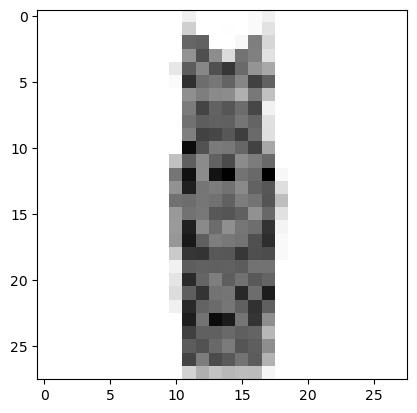

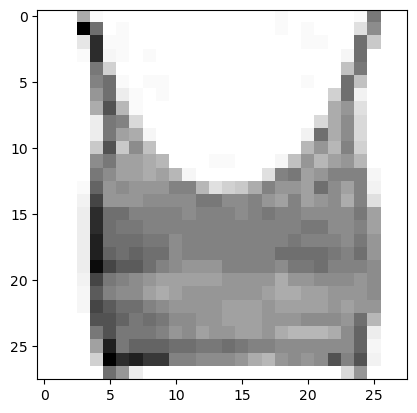

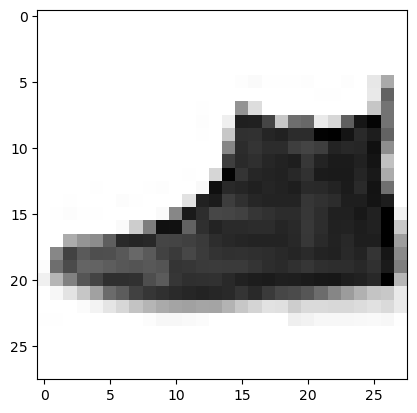

epoch: 2, iter: 5999, train loss: 0.3189949029500458, train acc: 0.89275, eval loss: 0.3664587940734753, eval acc: 0.8661


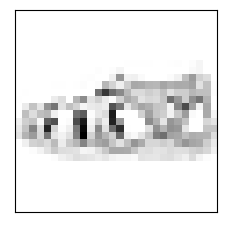

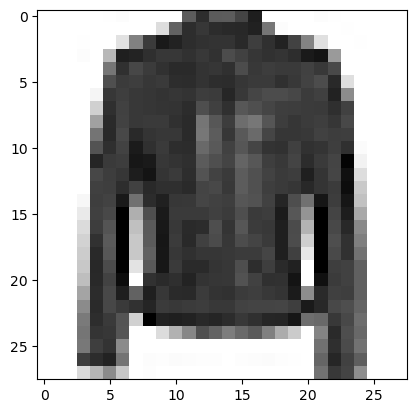

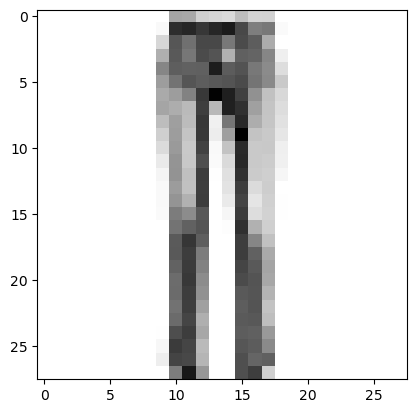

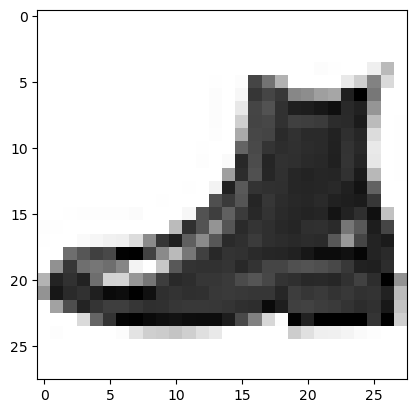

epoch: 2, iter: 6999, train loss: 0.32382065843847524, train acc: 0.886, eval loss: 0.36121571045824824, eval acc: 0.8638


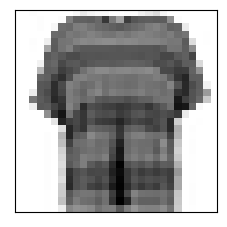

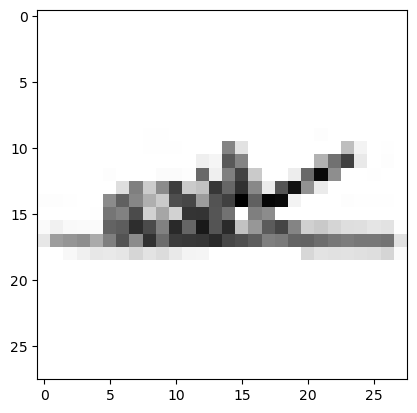

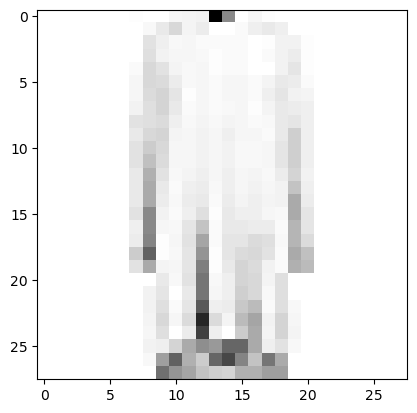

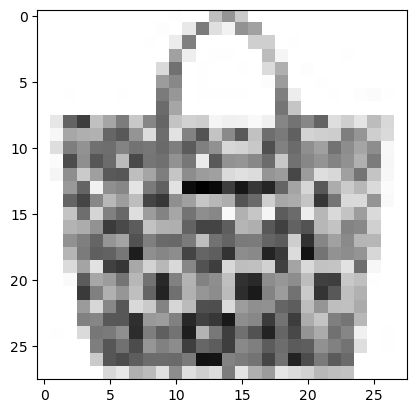

epoch: 2, iter: 7999, train loss: 0.3332030315842276, train acc: 0.8905, eval loss: 0.33638074738444557, eval acc: 0.8761


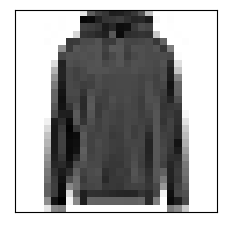

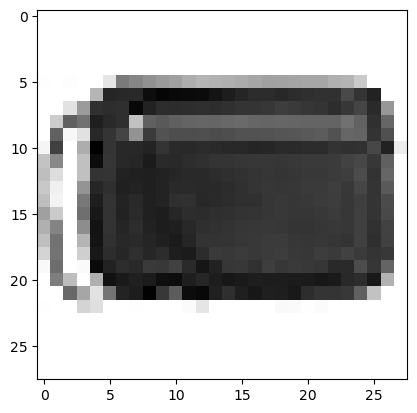

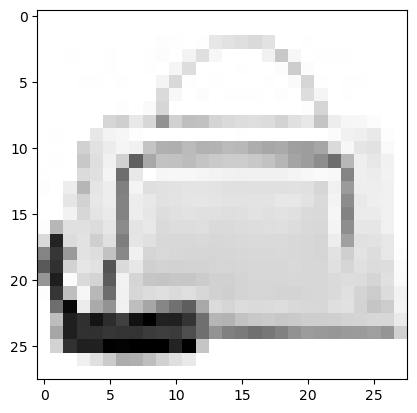

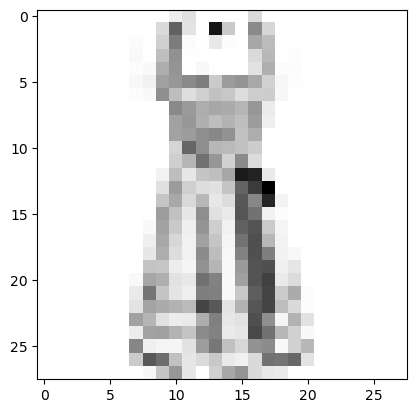

epoch: 2, iter: 8999, train loss: 0.33964925896302156, train acc: 0.88125, eval loss: 0.3381153487936375, eval acc: 0.8746


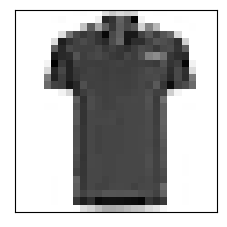

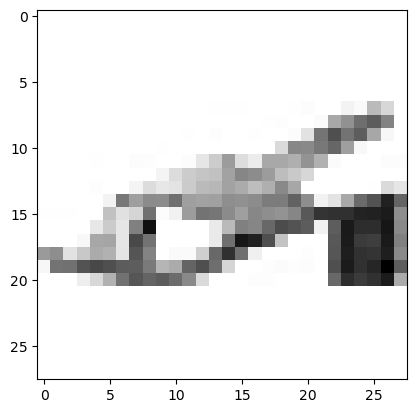

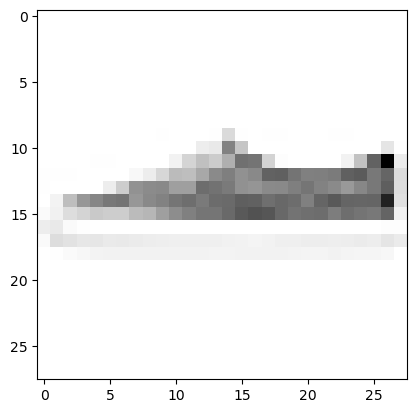

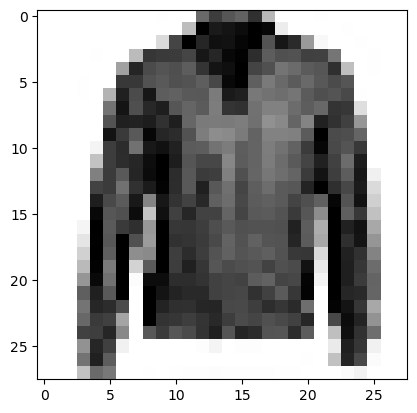

epoch: 2, iter: 9999, train loss: 0.30958567483895966, train acc: 0.889, eval loss: 0.34723150851252793, eval acc: 0.8711


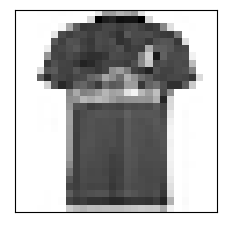

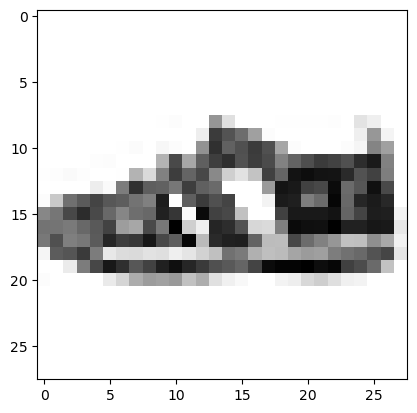

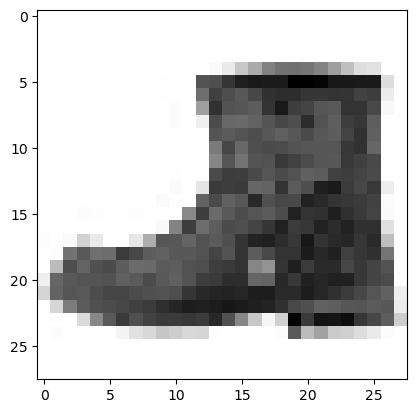

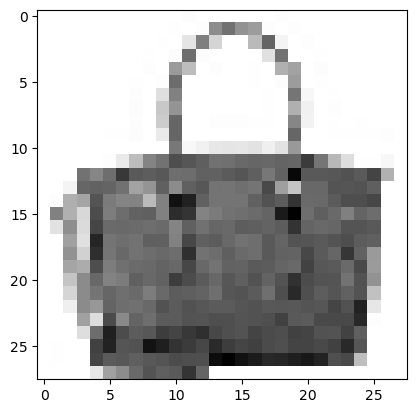

epoch: 2, iter: 10999, train loss: 0.3158434407078603, train acc: 0.893, eval loss: 0.358962267356104, eval acc: 0.869


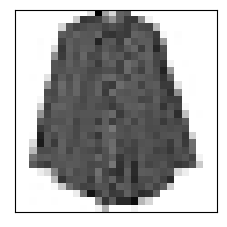

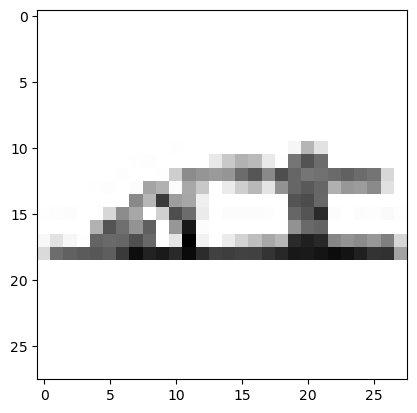

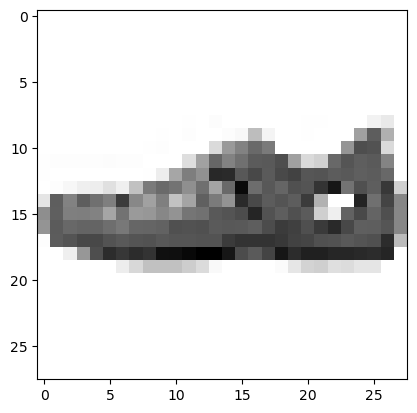

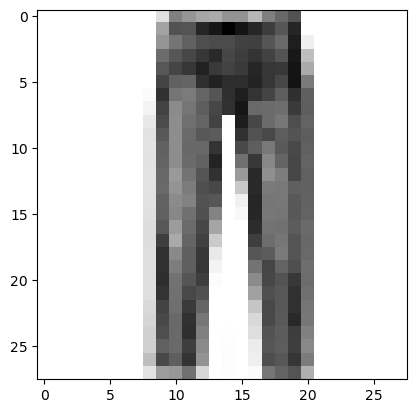

epoch: 2, iter: 11999, train loss: 0.3076300510179426, train acc: 0.89475, eval loss: 0.35553760340119117, eval acc: 0.8695


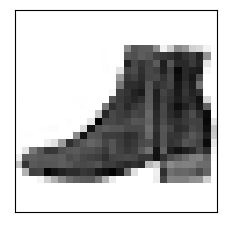

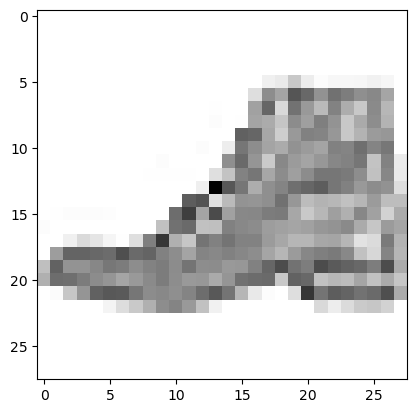

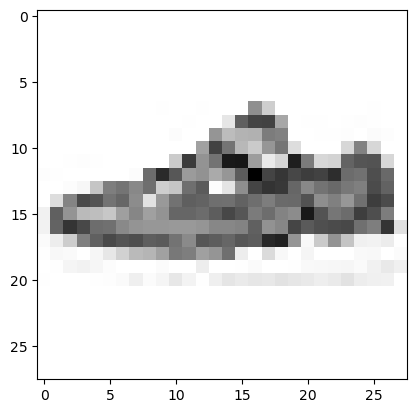

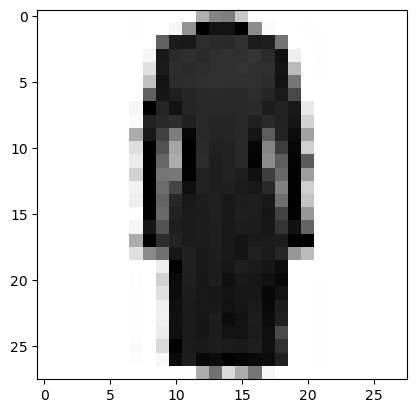

epoch: 2, iter: 12999, train loss: 0.3272668482902227, train acc: 0.889, eval loss: 0.3314183666644713, eval acc: 0.8774


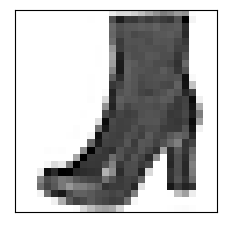

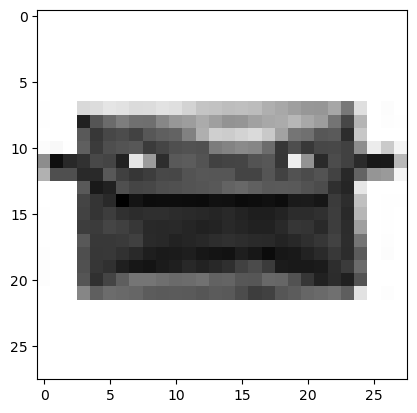

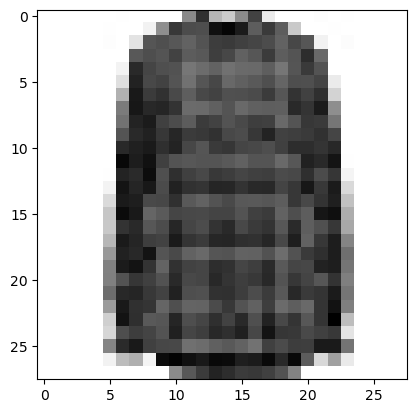

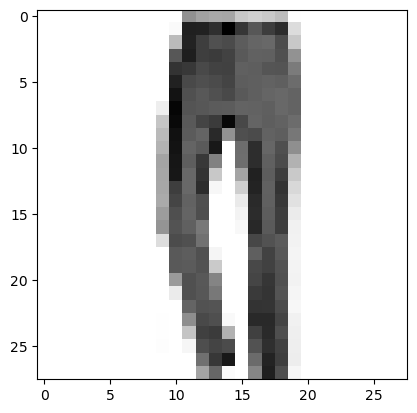

epoch: 2, iter: 13999, train loss: 0.34047925252249844, train acc: 0.8845, eval loss: 0.3500889645837422, eval acc: 0.8706


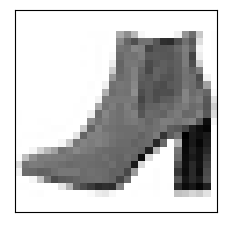

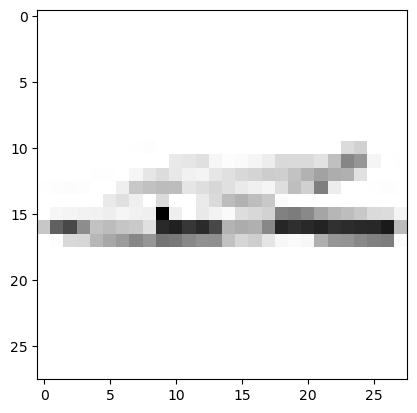

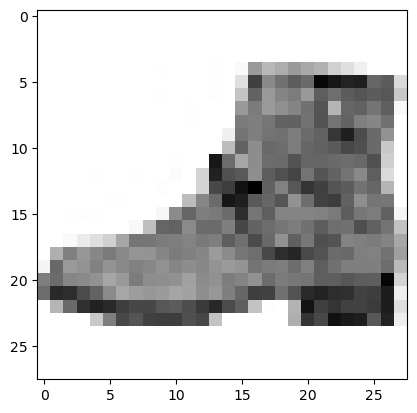

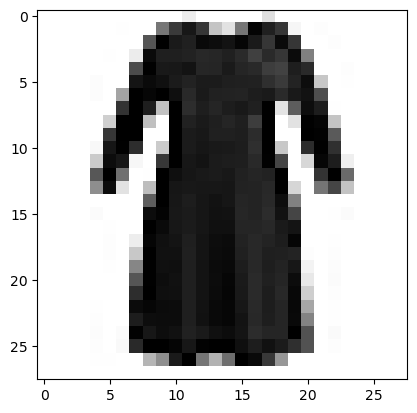

epoch: 2, iter: 14999, train loss: 0.30630248267803106, train acc: 0.89225, eval loss: 0.3256803462405398, eval acc: 0.8787
Finished Training


In [43]:
#定义模型训练过程
# 记录训练误差和训练准确率
running_loss = 0.0
running_acc = 0.0
for epoch in range(3):  # loop over the dataset multiple times
 
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
 
        # zero the parameter gradients
        optimizer.zero_grad()
 
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
 
        running_loss += loss.item()
        running_acc += accuracy(net, inputs, labels).item()
        if i % 1000 == 999:    # every 1000 mini-batches...
            net.eval()
            # 记录训练集的整体损失和准确率
            # ...log the running loss
            writer.add_scalar('Loss/training loss', running_loss / 1000, epoch * len(trainloader) + i)
            writer.add_scalar("Accuracy/training accuracy", running_acc / 1000, epoch * len(trainloader) + i)
            
            # 记录测试集的整体损失和准确率
            eval_loss, eval_acc, eval_probs, eval_prebs = evaluate(net, testloader)
            writer.add_scalar("Loss/testing loss", eval_loss, epoch * len(trainloader) + i)
            writer.add_scalar("Accuracy/testing accuracy", eval_acc, epoch * len(trainloader) + i)
            
            # 记录测试集各个类别的准确率
#             for cls_name, cls_acc in plot_accuracy(eval_prebs, testset.targets, classes).items():
#                 writer.add_scalar("Accuracy/{}".format(cls_name), cls_acc, epoch * len(trainloader) + i)
            writer = plot_accuracy(writer, eval_prebs, testset.targets, classes)
            
            # 记录测试集各个类别的P-R曲线
            writer = plot_pr_curve(writer, eval_probs, testset.targets, classes, 
                                   step=epoch * len(trainloader) + i)
            
            # 记录测试集各个类别的ROC曲线
            writer.add_figure("testing roc curve", 
                              plot_roc_curve(eval_probs, testset.targets, classes), 
                              global_step=epoch * len(trainloader) + i)
 
            # 输出样本的真实标签和预测标签、预测概率
            # ...log a Matplotlib Figure showing the model's predictions on a
            # random mini-batch
            writer.add_figure('predictions vs. actuals',
                            plot_classes_preds(net, inputs, labels),
                            global_step=epoch * len(trainloader) + i)
            
            print("epoch: {}, iter: {}, train loss: {}, train acc: {}, eval loss: {}, eval acc: {}".format(epoch, i, 
                                                                                                           running_loss / 1000, 
                                                                                                           running_acc / 1000, 
                                                                                                           eval_loss, 
                                                                                                           eval_acc))
            running_loss = 0.0
            running_acc = 0.0
            net.train()
writer.close()
print('Finished Training')